# PREDIKSI PENYAKIT KANKER PAYUDARA DENGAN MENGGUNAKAN METODE K-NEAREST NEIGHBOR (K-NN) DAN SUPPORT VEKTOR MACHINE (SVM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# funtion untuk ploting roc curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [3]:
# membaca dataset hepatitis.data
df = pd.read_csv('breast-cancer.data')

In [4]:
# mengganti dataset missing '?' dengan 0
df.replace('?', 0, inplace=True)
# Menghapus baris id
df.drop(['id'], 1, inplace=True)
df.shape

(699, 10)

In [5]:
# menampilkan 5 dataset pertama
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromation,Normal Nucleoli,Mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
# membagi dataset menjadi 2 yaitu X & y
# data X berisi semua baris kecuali baris class
X = np.array(df.drop(['class'],1))
# data y berisi baris class saja
y = np.array(df['class'])
# mengubah nilai class dari 2 & 4 menjadi 0 & 1
y[y ==  2] = 0
y[y ==  4] = 1

In [7]:
# split data X & y 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Pengklasifikasian Menggunakan Metode Support Vector Machine (SVM)

In [8]:
# import metode svm dari sklearn
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
svm_pred = svclassifier.predict(X_test)

In [10]:
svm_conf_matrix = confusion_matrix(y_test,svm_pred)
svm_tp = svm_conf_matrix[0][0]
svm_fp = svm_conf_matrix[0][1]
svm_fn = svm_conf_matrix[1][0]
svm_tn = svm_conf_matrix[1][1]
svm_accuracy = 100*((svm_tp+svm_tn)/(svm_tp+svm_fp+svm_fn+svm_tn))
svm_sensitifity = 100*(svm_tp/(svm_tp+svm_fn))
svm_specificity = 100*(svm_tn/(svm_tn+svm_fp))
svm_ppv = 100*(svm_tp/(svm_tp+svm_fp))
svm_npv = 100*(svm_tn/(svm_tn+svm_fn))
print("""
SVM confusion matrix: 
{}
Accuracy    : {}%
Sensitivity : {}%
Specificity : {}%
PPV         : {}%
NPV         : {}%
""".format(svm_conf_matrix, 
           format(svm_accuracy,'.2f'),
           format(svm_sensitifity,'.2f'),
           format(svm_specificity,'.2f'),
           format(svm_ppv,'.2f'),
           format(svm_npv,'.2f')))


SVM confusion matrix: 
[[94  1]
 [ 0 45]]
Accuracy    : 99.29%
Sensitivity : 100.00%
Specificity : 97.83%
PPV         : 98.95%
NPV         : 100.00%



In [11]:
svm_probs = svclassifier.predict_proba(X_test)

In [12]:
svm_probs = svm_probs[:, 1]

In [13]:
svm_auc = roc_auc_score(y_test, svm_probs)
print('SVM AUC: %.2f' % svm_auc)

SVM AUC: 1.00


In [14]:
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_probs)

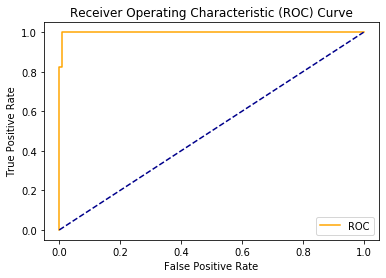

In [15]:
plot_roc_curve(svm_fpr, svm_tpr)

# Pengklasifikasian Menggunakan Metode K-Nearest Neighbors (K-NN)

In [16]:
# import metode K-NN dari sklearn
from sklearn import neighbors
knnclassifier = neighbors.KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
knn_pred = knnclassifier.predict(X_test)

In [18]:
knn_conf_matrix = confusion_matrix(y_test,knn_pred)
knn_tp = knn_conf_matrix[0][0]
knn_fp = knn_conf_matrix[0][1]
knn_fn = knn_conf_matrix[1][0]
knn_tn = knn_conf_matrix[1][1]
knn_accuracy = 100*((knn_tp+knn_tn)/(knn_tp+knn_fp+knn_fn+knn_tn))
knn_sensitifity = 100*(knn_tp/(knn_tp+knn_fn))
knn_specificity = 100*(knn_tn/(knn_tn+knn_fp))
knn_ppv = 100*(knn_tp/(knn_tp+knn_fp))
knn_npv = 100*(knn_tn/(knn_tn+knn_fn))
print("""
KNN confusion matrix: 
{}
Accuracy    : {}%
Sensitivity : {}%
Specificity : {}%
PPV         : {}%
NPV         : {}%
""".format(knn_conf_matrix, 
           format(knn_accuracy,'.2f'),
           format(knn_sensitifity,'.2f'),
           format(knn_specificity,'.2f'),
           format(knn_ppv,'.2f'),
           format(knn_npv,'.2f')))


KNN confusion matrix: 
[[94  1]
 [ 1 44]]
Accuracy    : 98.57%
Sensitivity : 98.95%
Specificity : 97.78%
PPV         : 98.95%
NPV         : 97.78%



In [19]:
knn_probs = knnclassifier.predict_proba(X_test)

In [20]:
knn_probs = knn_probs[:, 1]

In [21]:
knn_auc = roc_auc_score(y_test, knn_probs)
print('KNN AUC: %.2f' % knn_auc)

KNN AUC: 0.99


In [22]:
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probs)

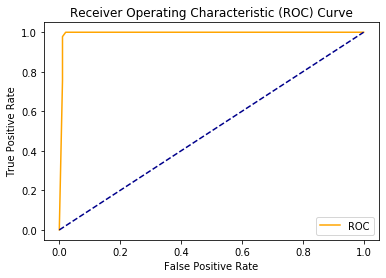

In [23]:
plot_roc_curve(knn_fpr, knn_tpr)

# PERBANDINGAN ROC CURVE ANTARA KNN DAN SVM

In [24]:
# fungsi untuk membuat ploting perbandingan roc curve
def plot_compare_roc_curve(fpr1, tpr1, fpr2, tpr2):
    plt.plot(fpr1, tpr1, color='red', label='SVM')
    plt.plot(fpr2, tpr2, color='green', label='KNN')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

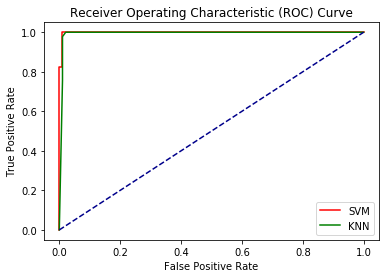

In [25]:
plot_compare_roc_curve(svm_fpr, svm_tpr, knn_fpr, knn_tpr)